In [1]:
import collections
from operator import itemgetter
import json

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def ParseJSONtoDict (filename):
    # Read JSON data into the datastore variable
    if filename:
        with open(filename, 'r') as f:
            datastore = json.load(f)
    return datastore


In [3]:
# Store data into JSON
def SaveNodesEdgesinJSON (nodes, edges, fileName):
    with open('json/'+fileName+'Nodes.json', 'w') as json_file:
        json.dump(nodes, json_file)

    with open('json/'+fileName+'Edges.json', 'w') as json_file:
        json.dump(edges, json_file)

In [25]:
class Networks:
    
    def __init__ (self):
        self.scseGraph = nx.Graph()
        self.scseMultiGraph = nx.MultiGraph()
        self.CreateScseNetwork()
        
    def CreateScseNetwork (self):
        nodes = ParseJSONtoDict('json/authorNodes.json')
        edges = ParseJSONtoDict('json/authorEdges.json')
        self.scseGraph.add_nodes_from(nodes)
        self.scseGraph.add_edges_from(edges)
        self.scseMultiGraph.add_nodes_from(nodes)
        self.scseMultiGraph.add_edges_from(edges)

    def GetScseNetwork(self):
        return self.scseGraph
    
    def GetScseMultiNetwork(self):
        return self.scseMultiGraph



In [26]:
# inititalize networks class to create networkx graphs
networks = Networks()

In [27]:
#print(networks.authorGraph.nodes.data())
print("********************")
# print(networks.authorGraph.edges())
# print(networks.authorGraph.number_of_nodes())
# print(networks.authorGraph.number_of_edges())
print(networks.scseGraph.nodes['Kheng Leong Tan'])

********************
{'size': 2, 'success': 0, 'tier1cnt': 0, 'reputation': 2, 'management': 'N', 'position': 'Lecturer', 'area': 'Cyber Security', 'start': 2019, 'end': 2019, 'publ': [{'key': 'conf/educon/TanG19', 'conftype': 'educon', 'year': '2019', 'conf': 'educon2019', 'tier': 3, 'authors': ['Kheng Leong Tan']}, {'key': 'conf/educon/TanJ19', 'conftype': 'educon', 'year': '2019', 'conf': 'educon2019', 'tier': 3, 'authors': ['Kheng Leong Tan']}]}


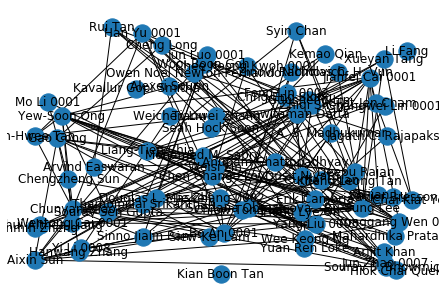

In [45]:
nx.draw_random(networks.GetScseNetwork(),with_labels=True)

In [8]:

# G=nx.Graph()
# G.add_node("a")
# G.add_nodes_from(["b","c"])

# G.add_edge(1,2)
# edge = ("d", "e")
# G.add_edge(*edge)
# edge = ("a", "b")
# G.add_edge(*edge)

# print("Nodes of graph: ")
# print(G.nodes())
# print("Edges of graph: ")
# print(G.edges())

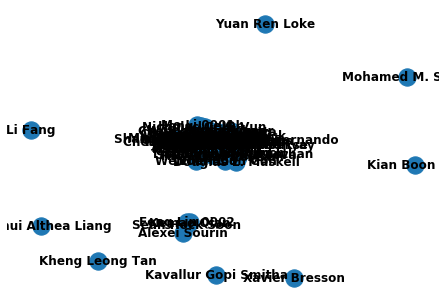

In [9]:
nx.draw(networks.GetScseNetwork(),with_labels=True, font_weight='bold')

In [12]:
nx.info(networks.GetScseNetwork())

'Name: \nType: MultiGraph\nNumber of nodes: 75\nNumber of edges: 2836\nAverage degree:  75.6267'

In [11]:
#G = nx.path_graph(4)
centrality = nx.eigenvector_centrality(networks.GetScseNetwork())
sorted((v, f"{c:f}") for v, c in centrality.items())

NetworkXNotImplemented: not implemented for multigraph type

In [13]:
def GetScseDegreeDistribution(graph):
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    degList, degCountList = zip(*degreeCount.items())

    N = len(graph.nodes)
    pk = []
    for cnt in degCountList:
        pk.append(cnt/N)

    degList = sorted(degList)
    pk = sorted(pk, reverse=True)

    plt.figure()
    plt.scatter(degList, pk, c="r", s=10)

    plt.yscale('log')
    plt.xscale('log')

    axes = plt.gca()
    axes.set_xlim([0.9,max(degList)])
    axes.set_ylim([min(pk)*0.5, 1])

    plt.title("Author Degree Distribution")
    plt.ylabel("Pk")
    plt.xlabel("Degree")
    # plt.savefig("AuthorDegreeDistribution.png")
    # graph too large to be drawn, but algorithms based on degree etc, can be done
    return plt, degList, pk

(<module 'matplotlib.pyplot' from 'C:\\Users\\Bryan\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 [0,
  2,
  4,
  6,
  8,
  10,
  12,
  14,
  16,
  18,
  20,
  24,
  26,
  28,
  32,
  34,
  42,
  44,
  46,
  48,
  50,
  52,
  70,
  78,
  82,
  84,
  92,
  98,
  102,
  106,
  108,
  112,
  136,
  142,
  148,
  152,
  158,
  166,
  180,
  182,
  186,
  234,
  290,
  344,
  396,
  480,
  594],
 [0.10666666666666667,
  0.05333333333333334,
  0.05333333333333334,
  0.04,
  0.04,
  0.04,
  0.04,
  0.04,
  0.04,
  0.02666666666666667,
  0.02666666666666667,
  0.02666666666666667,
  0.013333333333333334,
  0.013333333333333334,
  0.013333333333333334,
  0.013333333333333334,
  0.013333333333333334,
  0.013333333333333334,
  0.013333333333333334,
  0.013333333333333334,
  0.013333333333333334,
  0.013333333333333334,
  0.013333333333333334,
  0.013333333333333334,
  0.013333333333333334,
  0.013333333333333334,
  0.013333333333333334,
  0.013333333333333334,
  0.013333333333333334,


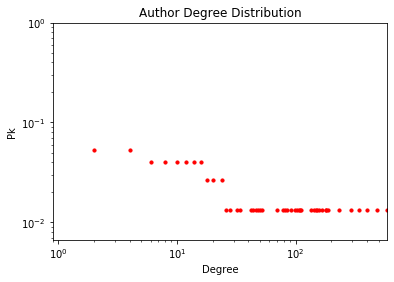

In [14]:
GetScseDegreeDistribution(networks.GetScseNetwork())

In [15]:
def FilterScseYear(Graph, startyear=2000, endyear=2020, min=1, max=4000, minSuccess = 0):
    filteredNodes = []
    varyingyear = startyear
    results = []
    
    while (varyingyear <= endyear):

        for node in Graph.nodes.data():
            if node[1]['start'] < varyingyear:
                filteredNodes.append(node[0])

        subGraph = Graph.subgraph(filteredNodes).copy()
        results.append(nx.info(subGraph))
        print("year ",varyingyear)
        print(nx.info(subGraph))
        varyingyear += 1

    return results

In [16]:
G = FilterScseYear(networks.GetScseNetwork(), startyear=2000, endyear=2021, min=1, max=4000, minSuccess = 0)

year  2000
Name: 
Type: MultiGraph
Number of nodes: 30
Number of edges: 1120
Average degree:  74.6667
year  2001
Name: 
Type: MultiGraph
Number of nodes: 35
Number of edges: 1512
Average degree:  86.4000
year  2002
Name: 
Type: MultiGraph
Number of nodes: 37
Number of edges: 1648
Average degree:  89.0811
year  2003
Name: 
Type: MultiGraph
Number of nodes: 41
Number of edges: 1850
Average degree:  90.2439
year  2004
Name: 
Type: MultiGraph
Number of nodes: 45
Number of edges: 1922
Average degree:  85.4222
year  2005
Name: 
Type: MultiGraph
Number of nodes: 49
Number of edges: 2062
Average degree:  84.1633
year  2006
Name: 
Type: MultiGraph
Number of nodes: 51
Number of edges: 2094
Average degree:  82.1176
year  2007
Name: 
Type: MultiGraph
Number of nodes: 57
Number of edges: 2230
Average degree:  78.2456
year  2008
Name: 
Type: MultiGraph
Number of nodes: 60
Number of edges: 2514
Average degree:  83.8000
year  2009
Name: 
Type: MultiGraph
Number of nodes: 62
Number of edges: 2522
Avera

In [ ]:
print(G)

In [ ]:

def DrawGraph(graph):
    nodessize = []
    edgecolors = []
    nodescolor = []

    edgeslist = graph.edges.data()

    for node in graph.nodes.data():
        nodessize.append(node[1]['size'])
        if node[1]['tier'] == 1:
            nodescolor.append([1,0,0])
        elif node[1]['tier'] == 2:
            nodescolor.append([1,0.2,0.2])
        elif node[1]['tier'] == 3:
            nodescolor.append([1,0.4,0.4])

    maxSize = max(nodessize)
    minSize = min(nodessize)
    maxNodeSize = 5000
    for size in nodessize:
        size = (size - minSize) / (maxSize -minSize) * maxNodeSize + 1000

    edgemax = max(edgeslist, key=lambda x: x[2]['weight'])[2]['weight']
    edgemin = min(edgeslist, key=lambda x: x[2]['weight'])[2]['weight']
    M = graph.number_of_edges()
    edgealphas = []
    for edge in edgeslist:
        weight = edge[2]['weight']
        color = (weight - edgemin) / (edgemax - edgemin)
        edgecolors.append(color)
        edgealphas.append(color)

    # plt.figure(figsize=(20,20))
    pos=nx.spring_layout(graph, k=5)

    nx.draw_networkx_nodes(
        graph,
        pos=pos,
        node_color=nodescolor,
        node_size=nodessize
    )

    edges = nx.draw_networkx_edges(
        graph,
        pos=pos,
        arrowstyle="->",
        arrowsize=5,
        edge_color=edgecolors,
        edge_cmap=plt.cm.Greys,
        width=1,
    )

    nx.draw_networkx_labels(
        graph, pos=pos, font_size=6,
        font_color='k', font_family='sans-serif',
        font_weight='normal', alpha=None,
        bbox=None, ax=None
    )

    # set alpha value for each edge
    for i in range(M):
        edges[i].set_alpha(edgealphas[i])


In [ ]:
DrawGraph(G)

In [ ]:
print(type(G))

In [17]:
#filterby: 'management','position','area'
#rank(management): "Y"
def filterGraphs(graph, filterby, rank1, rank2 = None):
    filteredNodes= []
    if rank2:
        for node in graph.nodes.data():
            if node[1][filterby] == rank1 or node[1][filterby]== rank2:
                filteredNodes.append(node[0])
    else:
        for node in graph.nodes.data():
            if node[1][filterby] == rank1:
                filteredNodes.append(node[0])

    subGraph = graph.subgraph(filteredNodes).copy()
    return subGraph

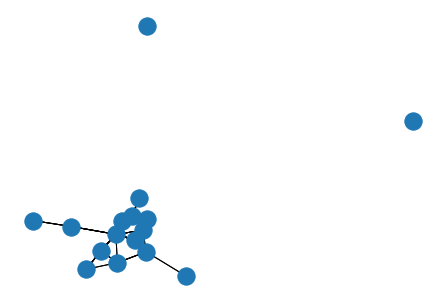

In [18]:
Profs = filterGraphs(networks.GetScseNetwork(),"Professor")
nx.draw(Profs)

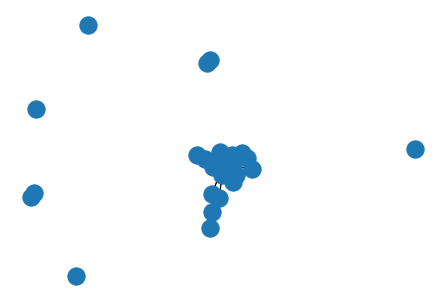

In [19]:
AssoProfs = filterGraphs(networks.GetScseNetwork(),"Associate Professor")
nx.draw(AssoProfs)

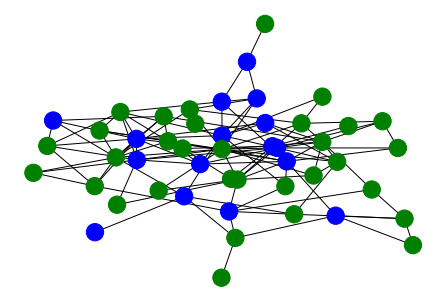

In [42]:
tgt = filterGraphs(networks.GetScseNetwork(),"Associate Professor", "Professor")
#nx.draw(tgt)
color_map = []
for node in tgt.node.data():
    if node[1]['position'] == "Professor":
        color_map.append('blue')
    else: 
        color_map.append('green')      
nx.draw_kamada_kawai(tgt, node_color=color_map)
#nx.draw_random(tgt, node_color=color_map)
plt.show()

In [23]:
print(nx.info(tgt))
print("****************************")
#print(nx.clustering(tgt))
#centrality = nx.eigenvector_centrality(networks.GetScseNetwork())
print("****************************")
#print(sorted((v, f"{c:0.2f}") for v, c in centrality.items()))
print("*****************************")
density = nx.density(tgt)
print("Network density:", density)

Name: 
Type: MultiGraph
Number of nodes: 48
Number of edges: 1854
Average degree:  77.2500
****************************
****************************
*****************************
Network density: 1.6436170212765957


In [24]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(tgt))

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(tgt)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

subgraph = tgt.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

False
Network diameter of largest component: 6


In [ ]:
#https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python#lesson-goals

In [29]:
nx.degree_histogram(tgt)

[1,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 3,
 0,
 3,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
